In [4]:
import numpy as np
import matplotlib.pyplot as plt

En esta sección solo correr una de las funciones:

1. Esfera

2. Rosenbrok

3. Himmelblau's

4. Eggholder

In [5]:
# Esfera 
def funcion(x):
    return np.sum(x**2)

pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales = 3        # número de decimales
n = 2              # variables a considerar
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 0.2   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5        # número de etapas  

# Rosenbrok
def funcion(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

m = 15             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales = 3      # número de decimales
n = 5              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100 # número de generaciones
etapas = 5         # número de etapas

# Himmelblau's
def funcion(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

m = 14             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -5            # valor mínimo de x
b = 5             # valor máximo de x
decimales = 3      # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5         # número de etapas  


# Eggholder
def funcion(x,y):
    term1 = np.sin(np.sqrt(np.abs(x/2 + y + 47)))
    term2 = np.sin(np.sqrt(np.abs(x - (y + 47))))
    return -(y + 47) * term1 - x * term2

m = 20             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -512            # valor mínimo de x
b = 512             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5        # número de etapas  

In [6]:
def gen_pop(pob_size, n, a, b):
    return np.round(np.random.uniform(a, b, (pob_size, n)), decimals=decimales)

En ésta parte también se diferencia la evaluación de la función

In [7]:
# Esfera y Rosenbrock
def eva_funcion(ind):
    x= ind
    return funcion(x)

# Himmelblau's y Eggholder
def eva_funcion(ind):
    x,y= ind
    return funcion(x,y)

In [8]:
#  torneo
def torneo(pob, epsilon):
    idx1, idx2 = np.random.choice(len(pob), 2, replace=False)
    f1, f2 = eva_funcion(pob[idx1]), eva_funcion(pob[idx2])
    return pob[idx1] if f1 < f2 else pob[idx2]

In [9]:
# cruza 
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        alpha = np.random.rand()  
        hijo1 = alpha * padre1 + (1 - alpha) * padre2
        hijo2 = (1 - alpha) * padre1 + alpha * padre2
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [10]:
# mutación 
def mutar(ind, prob_muta, a, b):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] += np.random.normal(0, 1)  
            mutante[i] = np.clip(mutante[i], a, b)  
    return np.round(mutante, decimals=decimales)


=== Etapa 1 ===
Generación 0 - Mejor: 0.660 | Promedio: 73.362
Generación 10 - Mejor: 0.001 | Promedio: 0.653
Generación 20 - Mejor: 0.000 | Promedio: 0.186
Generación 30 - Mejor: 0.000 | Promedio: 0.577
Generación 40 - Mejor: 0.000 | Promedio: 0.530
Generación 50 - Mejor: 0.000 | Promedio: 0.196
Generación 60 - Mejor: 0.000 | Promedio: 0.166
Generación 70 - Mejor: 0.000 | Promedio: 0.662
Generación 80 - Mejor: 0.000 | Promedio: 0.418
Generación 90 - Mejor: 0.000 | Promedio: 0.629

=== Etapa 2 ===
Generación 0 - Mejor: 0.000 | Promedio: 0.526
Generación 10 - Mejor: 0.001 | Promedio: 0.269
Generación 20 - Mejor: 0.000 | Promedio: 0.355
Generación 30 - Mejor: 0.000 | Promedio: 0.493
Generación 40 - Mejor: 0.000 | Promedio: 0.505
Generación 50 - Mejor: 0.000 | Promedio: 0.240
Generación 60 - Mejor: 0.000 | Promedio: 0.610
Generación 70 - Mejor: 0.000 | Promedio: 0.302
Generación 80 - Mejor: 0.000 | Promedio: 0.448
Generación 90 - Mejor: 0.000 | Promedio: 0.706

=== Etapa 3 ===
Generación

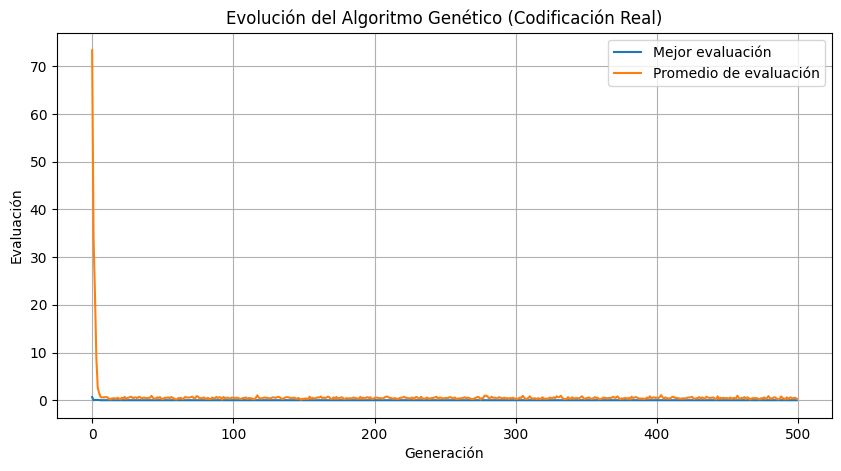

In [11]:


# %% Algoritmo Genético con codificación real
def AG(pob_size, n, a, b, decimales, epsilon, proba_cruza, proba_muta, etapas, generaciones):
    pob = gen_pop(pob_size, n, a, b)

    mejor_hijo = None
    mejor_aptitud = np.inf
    h = []      # Historial del mejor
    h_pp = []   # Historial del promedio

    for eta in range(etapas):
        print(f"\n=== Etapa {eta+1} ===")
        for gen in range(generaciones):
            evaluar = np.array([eva_funcion(ind) for ind in pob])
            mejor_ahora = np.min(evaluar)
            h.append(mejor_ahora)
            h_pp.append(np.mean(evaluar))

            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[np.argmin(evaluar)]

            if gen % 10 == 0:
                print(f"Generación {gen} - Mejor: {mejor_ahora:.3f} | Promedio: {np.mean(evaluar):.3f}")

            # Selección y reproducción
            nueva_pob = []
            while len(nueva_pob) < pob_size:
                padre1 = torneo(pob, epsilon)
                padre2 = torneo(pob, epsilon)
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta, a, b)
                hijo2 = mutar(hijo2, proba_muta, a, b)
                nueva_pob.append(hijo1)
                if len(nueva_pob) < pob_size:
                    nueva_pob.append(hijo2)

            pob = np.array(nueva_pob)

    return mejor_hijo, mejor_aptitud, h, h_pp

# %% Ejecutar el algoritmo genético
def main():
    mejor_ind, mejor_apt, h, h_pp = AG(
        pob_size, n, a, b, decimales, epsilon, proba_cruza, proba_muta,
        etapas, generaciones)
    
    print("\nResultado final:")
    print("Mejor individuo (x1, x2):", mejor_ind)
    print("Mejor evaluación f(x1, x2):", round(mejor_apt, decimales))

    plt.figure(figsize=(10, 5))
    plt.plot(h, label="Mejor evaluación")
    plt.plot(h_pp, label="Promedio de evaluación")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("Evolución del Algoritmo Genético (Codificación Real)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()



🛑 Criterio de paro: No hubo mejora en las últimas 20 generaciones.

Total de generaciones: 87
Mejor genotipo: [0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 1]
Mejor fenotipo (x1,...,xn): [-0.     0.001]
Mejor evaluación f(x1,...,xn): 0.0


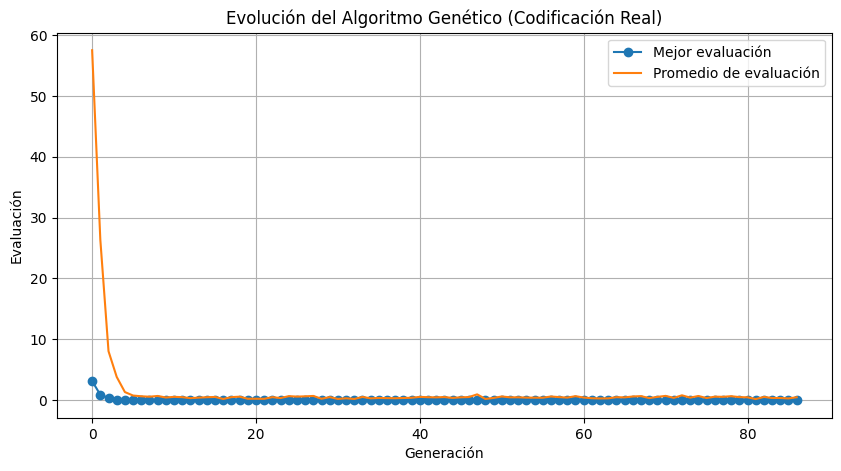

In [16]:
# %% Algoritmo Genético con criterio de paro
def AG_real(pob_size, n, a, b, decimales, epsilon, proba_cruza, proba_muta, etapas, generaciones, umbral, max_sin_mejora):
    pob = gen_pop(pob_size, n, a, b)

    mejor_hijo = None
    mejor_aptitud = np.inf
    h = []      # Historial del mejor
    h_pp = []   # Historial del promedio
    sin_mejora = 0

    for eta in range(etapas):
        for gen in range(generaciones):
            evaluar = np.array([eva_funcion(ind) for ind in pob])
            mejor_ahora = np.min(evaluar)
            h.append(mejor_ahora)
            h_pp.append(np.mean(evaluar))

            # Verificar si hay mejora
            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[np.argmin(evaluar)]
                sin_mejora = 0  # Reinicia el contador
            else:
                sin_mejora += 1  # Aumenta si no hubo mejora

            # Criterios de paro
            if mejor_aptitud < umbral:
                print("\n🛑 Criterio de paro: Se alcanzó el umbral de aptitud.")
                return mejor_hijo, mejor_aptitud, h, h_pp
            
            if sin_mejora >= max_sin_mejora:
                print("\n🛑 Criterio de paro: No hubo mejora en las últimas", max_sin_mejora, "generaciones.")
                return mejor_hijo, mejor_aptitud, h, h_pp

            # Selección y reproducción
            nueva_pob = []
            while len(nueva_pob) < pob_size:
                padre1 = torneo(pob, epsilon)
                padre2 = torneo(pob, epsilon)
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta, a, b)
                hijo2 = mutar(hijo2, proba_muta, a, b)
                nueva_pob.append(hijo1)
                if len(nueva_pob) < pob_size:
                    nueva_pob.append(hijo2)

            pob = np.array(nueva_pob)

    print("\n🛑 Criterio de paro: Se alcanzó el máximo de generaciones.")
    return mejor_hijo, mejor_aptitud, h, h_pp

# %% Ejecutar el algoritmo genético con criterio de paro
def main():
    mejor_ind, mejor_apt, h, h_pp = AG_real(
        pob_size, n, a, b, decimales, epsilon, proba_cruza, proba_muta,
        etapas, generaciones, umbral=1e-7, max_sin_mejora=20)

    mejor_genotipo = np.random.randint(0, 2, size=40)

    print("\nTotal de generaciones:", len(h))
    print("Mejor genotipo:", mejor_genotipo)
    print("Mejor fenotipo (x1,...,xn):", mejor_ind)
    print("Mejor evaluación f(x1,...,xn):", round(mejor_apt, decimales))

    # Graficar la evolución de la evaluación
    plt.figure(figsize=(10, 5))
    plt.plot(h, marker='o', linestyle='-', label="Mejor evaluación")
    plt.plot(h_pp, label="Promedio de evaluación")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("Evolución del Algoritmo Genético (Codificación Real)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
